<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Statistics Fundamentals, Part 1: Solution

_Authors: Alexander Egorenkov (DC), Amy Roberts (NYC)_

---

<a id="learning-objectives"></a>
## Learning Objectives
- Code summary statistics using NumPy and Pandas: mean, median, mode, max, min, quartile, inter-quartile range, variance, standard deviation, and correlation.
- Create basic data visualizations, including scatterplots, box plots, and histograms.
- Describe characteristics and trends in a data set using visualizations.
- Describe the bias and variance of statistical estimators.
- Identify a normal distribution within a data set using summary statistics and data visualizations.

### Lesson Guide
- [Code-Along: Examining the Titanic Data Set](#codealong-examining-the-titanic-dataset)
- [Descriptive Statistics Fundamentals](#descriptive-statistics-fundamentals)
	- [Measures of Central Tendency](#measures-of-central-tendency)
	- [Math Review](#math-review)
	- [Measures of Dispersion: Standard Deviation and Variance](#measures-of-dispersion-standard-deviation-and-variance)
- [Our First Model](#our-first-model)
- [Our Second Model](#our-second-model)
    - [An Introduction to Statsmodels](#an-introduction-to-statsmodels)
    - [A Preface on Modeling](#a-preface-on-modeling)
    - [Sklearn and Statmodels Documentation](#documentation)
    - [Fitting Multiple Linear Regression with Statsmodels](#statsmodels-regression)
    - [Statsmodels Summary() Function](#statsmodels-summary)
    - [Optional Exercise - Single Linear Regression in Statsmodels](#statsmodels-exercise)
- [A Short Introduction to Model Bias and Variance](#a-short-introduction-to-model-bias-and-variance)
	- [Bias-Variance Decomposition](#bias-variance-decomposition)
	- [Example Using Bessel's Correction](#example-using-bessels-correction)
- [Correlation and Association](#correlation-and-association)
	- [Code-Along: Correlation in Pandas](#codealong-correlation-in-pandas)
- [The Normal Distribution](#the-normal-distribution)
	- [What is the Normal Distribution?](#what-is-the-normal-distribution)
	- [Skewness](#skewness)
	- [Kurtosis](#kurtosis)
- [Determining the Distribution of Your Data](#determining-the-distribution-of-your-data)
	- [Exercise](#exercise)
- [Lesson Review](#topic-review)

In [3]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import LocalOutlierFactor
plt.style.use('fivethirtyeight')

# This makes sure that graphs render in your notebook
%matplotlib inline

<a id="where-are-we-in-the-data-science-workflow"></a>
## Where are we in the data science workflow?

![Data Science Workflow](../assets/images/data-science-workflow.png)

<a id="codealong-examining-the-titanic-dataset"></a>
## Code-Along: Examining the Titanic Data Set

---

#### Objective: Read in the Titanic data and look at a few summary statistics.

In [4]:
# import Pandas
import pandas as pd

In [5]:
titanic = pd.read_csv('../data/titanic.csv')

#### Print out the column names:

In [4]:
# Preview columns
titanic.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')

#### Print out the dimensions of the DataFrame using the `.shape` attribute:

In [5]:
# Preview data dimensions
titanic.shape

(891, 11)

#### Print out the data types of the columns using the `.dtypes` attribute:

In [6]:
# What are the column data types?
titanic.dtypes

survived      int64
pclass        int64
name         object
sex          object
age         float64
sibsp         int64
parch         int64
ticket       object
fare        float64
cabin        object
embarked     object
dtype: object

#### Print out the first five rows of the data using the built-in `.head()` function:

In [7]:
# Look at the first 5 rows
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Use the built-in  `.value_counts()` function to count the values of each type in the `pclass` column:

In [8]:
# Can we preview the plcass variable?
titanic['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

#### Pull up descriptive statistics for each variable using the built-in `.describe()` function:

In [9]:
# Pull up descriptive statistics for each variables
titanic.describe(include='all')

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"O'Connell, Mr. Patrick D",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [10]:
# Uh oh, we have some missing values, but we won't do anything with them for now

### Diagnosing Data Problems

- Whenever you get a new data set, the fastest way to find mistakes and inconsistencies is to look at the descriptive statistics.
  - If anything looks too high or too low relative to your experience, there may be issues with the data collection.
- Your data may contain a lot of missing values and may need to be cleaned meticulously before they can be combined with other data.
  - You can take a quick average or moving average to smooth out the data and combine that to preview your results before you embark on your much longer data-cleaning journey.
  - Sometimes filling in missing values with their means or medians will be the best solution for dealing with missing data. Other times, you may want to drop the offending rows or do real imputation.

<a id="descriptive-statistics-fundamentals"></a>
## Descriptive Statistics Fundamentals
---

- **Objective:** Code summary statistics using NumPy and Pandas: mean, median, mode, max, min, quartile, inter-quartile range, variance, standard deviation, and correlation.

### A Quick Review of Notation

The sum of a constant $k$, $n$ times
$$\sum_{i=1}^nk$$

In [11]:
# k + k + k + k + ... + k

> It is often helpful to think of these sums as `for` loops. For example, the equation can be compactly computed like so:

```
total = 0

# For i from 1 up to and including n, add k to the sum.
for i in range(1, n+1):
    total += k
```

> Or, even more succinctly (using a generator comprehension):

```
total = sum(k for i in range(1, n+1))
```

The sum of all numbers from 1 up to and including $n$:
$$\sum_{i=1}^ni$$

In [12]:
# 1 + 2 + 3 + ... + n

> ```
total = sum(i for i in range(1, n+1))
```

The sum of all $x$ from the first $x$ entry to the $n$th $x$ entry:
$$\sum_{i=0}^nx_i$$

In [13]:
# x_1 + x_2 + x_3 + ... + x_n

> ```
total = sum(xi in x)   # or just sum(x)
```

#### Code-Along

_Optional: Write down the mathematical notation for the following questions:_

In [1]:
# Compute the sum of 7 4s using base Python
print("Sum of 7 4s: {}".format(sum([4, 4, 4, 4, 4, 4, 4])))

Sum of 7 4s: 28


$$\sum_{i=1}^{7}{4}$$

In [15]:
# Compute the sum of 7 4s using NumPy
print("Sum of 7 4s: {}".format(np.sum([4, 4, 4, 4, 4, 4, 4])))

Sum of 7 4s: 28


$$\sum_{i=1}^{7}{4}$$

In [16]:
# Compute the sum of 1 through 10 using base Python
print("Sum of 1 through 10: {}".format(sum([x + 1 for x in range(10)])))

Sum of 1 through 10: 55


$$\sum_{i=0}^{10}{x_i}$$

In [6]:
# Using the titanic.fare column compute the total fare paid by passengers
print("Total fare using Numpy: {}".format(np.sum(titanic['fare'])))
print("Total fare using Pandas: {}".format(titanic['fare'].sum()))

Total fare using Numpy: 28693.9493
Total fare using Pandas: 28693.9493


<a id="measures-of-central-tendency"></a>
### Measures of Central Tendency

- Mean
- Median
- Mode

#### Mean
The mean — also known as the average or expected value — is defined as:
$$E[X] = \bar{X} =\frac 1n\sum_{i=1}^nx_i$$

It is determined by summing all data points in a population and then dividing the total by the number of points. The resulting number is known as the mean or the average.

Be careful — the mean can be highly affected by outliers. For example, the mean of a very large number and some small numbers will be much larger than the "typical" small numbers. Earlier, we saw that the mean squared error (MSE) was used to optimize linear regression. Because this mean is highly affected by outliers, the resulting linear regression model is, too.

#### Median
The median refers to the midpoint in a series of numbers. Notice that the median is not affected by outliers, so it more so represents the "typical" value in a set.

$$ 0,1,2,[3],5,5,1004 $$

$$ 1,3,4,[4,5],5,5,7 $$

To find the median:

- Arrange the numbers in order from smallest to largest.
    - If there is an odd number of values, the middle value is the median.
    - If there is an even number of values, the average of the middle two values is the median.

Although the median has many useful properties, the mean is easier to use in optimization algorithms. The median is more often used in analysis than in machine learning algorithms.

#### Mode
The mode of a set of values is the value that occurs most often.
A set of values may have more than one mode, or no mode at all.

$$1,0,1,5,7,8,9,3,4,1$$ 

$1$ is the mode, as it occurs the most often (three times).

#### Code-Along

In [18]:
# Find the mean of the titanic.fare series using base Python
print("Mean titanic fare: {}".format(sum(titanic['fare'])/float(len(titanic['fare']))))

Mean titanic fare: 32.2042079685746


In [19]:
# Find the mean of the titanic.fare series using NumPy
print("Mean titanic fare: {}".format(np.mean(titanic['fare'])))

Mean titanic fare: 32.204207968574636


In [20]:
# Find the mean of the titanic.fare series using Pandas
print("Mean titanic fare: {}".format(titanic['fare'].mean()))

Mean titanic fare: 32.204207968574636


In [21]:
# What was the median fare paid (using Pandas)?
print("Median titanic fare: {}".format(titanic['fare'].median()))

Median titanic fare: 14.4542


In [27]:
titanic.fare.mean()

32.2042079685746

In [22]:
# The mean and median are not the same, does this tell you anything about the fares?
# Let's discuss

# typically this is indicative that the distribution is not normal

In [7]:
# Use Pandas to find the most common fare paid on the Titanic
print("The most common fare is: {}".format(titanic['fare'].mode()))
# Notice that this returns a series instead of a single number, why?

The most common fare is: 0    8.05
dtype: float64


<a id="math-review"></a>
### Math Review

#### How Do We Measure Distance?

One method is to take the difference between two points:

$$X_2 - X_1$$

However, this can be inconvenient because of negative numbers.

We often use the following square root trick to deal with negative numbers. Note this is equivalent to the absolute value (if the points are 1-D):

$$\sqrt{(X_2-X_1)^2} = | X_2 - X_1 |$$

#### What About Distance in Multiple Dimensions?

We can turn to the Pythagorean theorem.

$$a^2 + b^2 = c^2$$

To find the distance along a diagonal, it is sufficient to measure one dimension at a time:

$$\sqrt{a^2 + b^2} = c$$

More generally, we can write this as the norm (You'll see this in machine learning papers):

$$\|X\|_2 = \sqrt{\sum{x_i^2}} = c$$

What if we want to work with points rather than distances? For points $\vec{x}: (x_1, x_1)$ and $\vec{y}: (y_1, y_2)$ we can write:

$$\sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2} = c$$
or
$$\sqrt{\sum{(x_i - y_i)^2}} = c$$
or
$$\| \vec{x} - \vec{y} \| = c$$

> You may be more familiar with defining points as $(x, y)$ rather than $(x_1, x_2)$. However, in machine learning it is much more convenient to define each coordinate using the same base letter with a different subscript. This allows us to easily represent a 100-dimensional point, e.g., $(x_1, x_2, ..., x_{100})$. If we use the grade school method, we would soon run out of letters!

<a id="measures-of-dispersion-standard-deviation-and-variance"></a>
### Measures of Dispersion: Standard Deviation and Variance

Standard deviation (SD, $σ$ for population standard deviation, or $s$ for sample standard deviation) is a measure that is used to quantify the amount of variation or dispersion from the mean of a set of data values. A low standard deviation means that most of the numbers are close to the average. A high standard deviation means that the numbers are spread out.

Standard deviation is the square root of variance:

$$variance = \frac {\sum{(x_i - \bar{X})^2}} {n-1}$$

$$s = \sqrt{\frac {\sum{(x_i - \bar{X})^2}} {n-1}}$$

> **Standard deviation** is often used because it is in the same units as the original data! By glancing at the standard deviation, we can immediately estimate how "typical" a data point might be by how many standard deviations it is from the mean. Furthermore, standard deviation is the only value that makes sense to visually draw alongside the original data.

> **Variance** is often used for efficiency in computations. The square root in the SD always increases with the function to which it is applied. So, removing it can simplify calculations (e.g., taking derivatives), particularly if we are using the variance for tasks such as optimization.

**That can be a lot to take in, so let's break it down in Python.**

#### Assign the first 5 rows of titanic age data to a variable:

In [24]:
# Take the first 5 rows of titanic age data
first_five = titanic.age[:5]

print(first_five)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64


#### Calculate the mean by hand:

In [25]:
# Calculate mean by hand
mean = (22 + 38 + 26 + 35 + 35) / 5.0

#### Calculate the variance by hand:

In [26]:
# Calculate variance by hand
(np.square(22 - mean) +
np.square(38 - mean) +
np.square(26 - mean) +
np.square(35 - mean) +
np.square(35 - mean)) / 4.0

46.699999999999996

#### Calculate the variance and the standard deviation using Pandas:

In [27]:
# Verify with Pandas
print(first_five.var())
print(first_five.std())

46.699999999999996
6.833739825307955


<a id="our-first-model"></a>
## Our First Model
---

In this section, we will make a **mathematical model** of data. When we say **model**, we mean it in the same sense that a toy car is a **model** of a real car. If we mainly care about appearance, the toy car model is an excellent model. However, the toy car fails to accurately represent other aspects of the car. For example, we cannot use a toy car to test how the actual car would perform in a collision.

In data science, we might take a rich, complex person and model that person solely as a two-dimensional vector: _(age, smokes cigarettes)_. For example: $(90, 1)$, $(28, 0)$, and $(52, 1)$, where $1$ indicates "smokes cigarettes." This model of a complex person obviously fails to account for many things. However, if we primarily care about modeling health risk, it might provide valuable insight.

Now that we have superficially modeled a complex person, we might determine a formula that evaluates risk. For example, an older person tends to have worse health, as does a person who smokes. So, we might deem someone as having risk should `age + 50*smokes > 100`. 

This is a **mathematical model**, as we use math to assess risk. It could be mostly accurate. However, there are surely elderly people who smoke who are in excellent health.


---

Let's make our first model from scratch. We'll use it predict the `fare` column in the Titanic data. So what data will we use? Actually, none.

The simplest model we can build is an estimation of the mean, median, or most common value. If we have no feature matrix and only an outcome, this is the best approach to make a prediction using only empirical data. 

This seems silly, but we'll actually use it all the time to create a baseline of how well we do with no data and determine whether or not our more sophisticated models make an improvement.

You can find out more about dummy estimators [here](http://scikit-learn.org/stable/modules/model_evaluation.html#dummy-estimators).

#### Get the `fare` column from the Titanic data and store it in variable `y`:

In [28]:
# Get the Fare column from the titanic data and store as y
y = titanic['fare']

#### Create predictions `y_pred` (in this case just the mean of `y`):

In [29]:
# Stored predictions in y_pred
y_pred = y.mean()

#### Find the average squared distance between each prediction and its actual value:

This is known as the mean squared error (MSE).

In [30]:
# Squared Error is really hard to read, Let's look at Mean Squared Error
np.mean(np.square(y-y_pred))

2466.665311685043

#### Calculate the root mean squared error (RMSE), the square root of the MSE:

In [31]:
np.sqrt(np.mean(np.square(y-y_pred)))

49.6655344447741

<a id="our-second-model"></a>
## Our Second Model
---

<a id="an-introduction-to-statsmodels"></a>
### An Introduction to Statsmodels
---

This section intends to introduce the modeling packages `sklearn` and `statsmodels` in the context of regression modeling. These are both powerful python packages with different strengths. 

In general:
- **`sklearn`** is the *machine learning* package
- **`statsmodels`** is the *statistics* package

Though the terms have immense overlap, machine learning tends to be more prediction focused while statistics is more inference focused. 

**Remember: even with all the power provided by these modeling tools, it's never a replacement for good EDA!**

<a id="a-preface-on-modeling"></a>
### A Preface on Modeling
---
As we venture down the path of modeling, it can be difficult to determine which choices are "correct" or "incorrect".  A primary challenge is to understand how different models will perform in different circumstances and different types of data. It's essential to practice modeling on a variety of data.

As a beginner it is essential to learn which metrics are important for evaluating your models and what they mean. The metrics we evaluate our models with inform our actions.  

*Exploring datasets on your own with the skills and tools you learn in class is highly recommended!*

<a id='documentation'></a>

## `sklearn` and `statsmodels` Documentation

---

Get familiar with looking up things in the `sklearn` and `statsmodels` documentation. You are going to be doing a lot of it over the course of DSI and beyond.

[The statsmodels documentation can be found here.](http://statsmodels.sourceforge.net/devel/) Many recommend using the bleeding-edge version of statsmodels. [For that you can reference the code on github.](https://github.com/statsmodels/statsmodels/)

[The sklearn documentation can be found here.](http://scikit-learn.org/stable/documentation.html)

The packages have fairly different approaches and syntax for constructing models. Below are examples for linear regression in each package:
* [Linear regression in statsmodels](http://statsmodels.sourceforge.net/devel/examples/#regression)
* [Linear regression in scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

If you haven't yet, familliarize yourself with the format of the documentation.

<a id='statsmodels-regression'></a>
## Fitting a Linear Regression Using `statsmodels`

---

Now we will fit the linear regression model predicting the target from the titanic dataset, but this time using `statsmodels`.

The format looks like:

```python
import statsmodels.api as sm

X = df[["FACTOR1","FACTOR2"]].values
# manually add the intercept column:
X = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
y = target

model = sm.OLS(y, X)
model = model.fit()
predictions = model.predict()
```

First we load the statsmodels api module, which contains the ordinary least squares `OLS` model class. The statsmodels process is slightly different:
- We manually make a new column for the intercept in our design matrix $X$.
- The $y$ target variable comes before the $X$ predictor
- The data is provided during the instantiation of the model object, then fit is called without the data.

**Fit the model using statsmodels.**

Let's see if we can predict `fare` (the price of the ticket) based on all the other factors in the titanic dataset.

First, let's clean up the data a bit. Let's limit the dataset to numeric factors only, using `pd.DataFrame.select_dtypes()`, and also drop any nulls in any of those factors by using `pd.DataFrame.dropna()`. We'll store the result in a new dataframe, `ti_clean`. 

In [8]:
ti_clean = titanic.drop(titanic.select_dtypes(exclude="number"), axis=1).dropna()

Next, we'll check for outliers. Linear regression is very sensitive to outliers, so we'll want to investigate and potentially remove those. Below, we can see that we have some very high fares in our target variable, and we'll want to scrub those out.

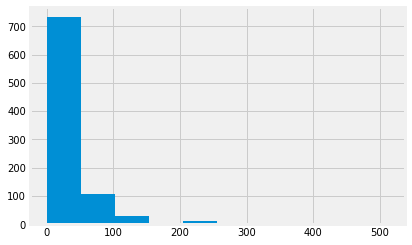

In [9]:
titanic['fare'].hist();

We'll use `sklearn.LocalOutlierFactor` for this, which can also be used to dynamically remove outliers in data pipelines. Here's how it works:

- Instantiate the class
- Perform a `fit_predict()` on the source dataframe. This is where outliers are detected, and returned as a numpy array. Values of `-1` in the array are considered outliers.
- Use this numpy array to create a boolean mask using `pd.DataFrame.apply()` to filter outliers from our source `ti_clean` dataframe

In [10]:
lof = LocalOutlierFactor(contamination='auto')

In [12]:
ti_clean = ti_clean[pd.Series(lof.fit_predict(ti_clean.values)).apply(lambda x: True if x == 1 else False).values]

Here's the output. Notice how the x axis limit is now 250, reduced from 500 in the previous histogram.

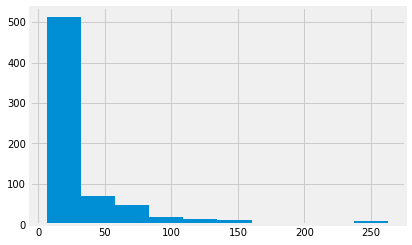

In [13]:
ti_clean['fare'].hist();

Now we've got our data cleaned up, let's fit a model! This will be a multiple regression model, meaning we've got more than one factor we're using to predict our target, `fare`.

<font color="red">Important!</font> the chart below is not the result of the regression line. We wouldn't be able to chart this because we've got more than one factor and only 2 charting dimensions. Instead, the line you're seeing is the line of 'perfect prediction'. Any points that land on this line have a predicted value equal to the actual (true) value. Values _below_ the line were fares predicted to be _higher_ than they _actually were_, and vice-versa.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


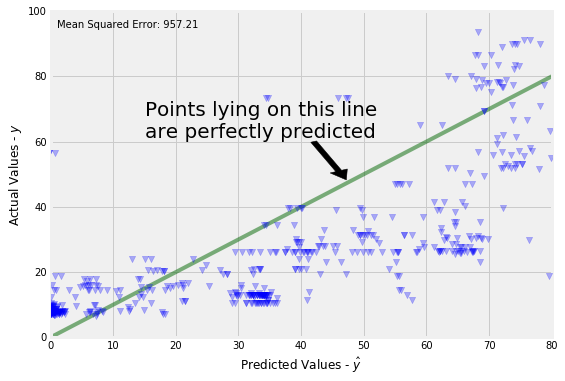

In [14]:
# use all numeric factors that are not the target factor, "fare"
X = ti_clean.drop("fare", axis=1).values
# append a matrix of 1s to produce a non-zero y intercept
X = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
# set "fare" as the factor we wish to predict
y = ti_clean["fare"].values

# Note the difference in argument order compared to sklearn
# optionally, you can chain "fit()" to the model object
model = sm.OLS(y, X)
model = model.fit()
predictions = model.predict(X)

# Plot the model

# set limits for the axes
chart_xlim = 100
chart_ylim = 80

plt.figure(figsize=(8,6))
plt.scatter(predictions, y, s=40, c=(0,0,1,0.3), marker='v', zorder=10)
plt.xlabel("Predicted Values - $\hat{y}$")
plt.ylabel("Actual Values - $y$")
plt.arrow(20, 20, 10, 10, fc='b')


# size the chart to relevant data
axes = plt.gca()
axes.set_xlim([0,80])
axes.set_ylim([0,100])
# annotate
axes.arrow(42, 60, 4, -9, width=1, head_width=3, head_length=3, fc='k', ec='k')
plt.text(15, 68, 'Points lying on this line', fontdict={'fontsize': 20})
plt.text(15, 61, 'are perfectly predicted', fontdict={'fontsize': 20})
plt.text(1, 95, f'Mean Squared Error: {mean_squared_error(y, predictions):.2f}', fontdict={'fontsize': 10})

# plot the prediction line, which is symetric between the x and y axes
plt.plot(range(0,100), range(0,100), c=(0,0.4,0,0.5))

plt.show();

By looking at `model.params`, we can return the coefficients of the regression line.

In [15]:
model.params

array([  1.20676648, -34.06839957,  -0.1498025 ,   6.62318573,
        10.4369678 , 105.59502601])

This may look a little cryptic at first. It's a numpy array with no labels! The labels are actually our input `X` array. The problem is that we converted it to a numpy array so we could process it in statsmodels. Let's reconstruct what this `X` array would look like with labels. Note that we have an additional column, `y_intercept` which is needed for OLS to calaulate a non-zero y-intercept. This was as a result of this line of code:

```python
np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
```

In [17]:
pd.DataFrame(X, columns=list(ti_clean.select_dtypes(include="number").drop("fare", axis=1).columns) + ['y_intercept']).head()

,survived,pclass,age,sibsp,parch,y_intercept
0,0.0,3.0,22.0,1.0,0.0,1.0
1,1.0,1.0,38.0,1.0,0.0,1.0
2,1.0,3.0,26.0,0.0,0.0,1.0
3,1.0,1.0,35.0,1.0,0.0,1.0
4,0.0,3.0,35.0,0.0,0.0,1.0


Taking these coefficients, along with their positional placement, and the header columns from our `X` array, we can create the following linear regression model (equation). This means that if we input values of `survived`, `pclass`, `age`, and `parch` into the equation below, we can _solve for_ the target variable, `fare`.

$$fare = (1.25*survived) + (-34*pclass) + (-0.15*age) + (6.6*sibsp) + (10.44*parch) + 105.67$$

We could take the above equation, feed in a range of values for each of the factors, and get returned a hyperplane that is the result of our multi line regression. However, this can't be visualized in 2 dimensions! If we reduced our regression to 1 factor, we could chart this out in 2 dimensions. We'll do that in a minute!

In [18]:
ti_clean.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


Statsmodels gives us a list of predictions for our model via the `statsmodels.OLS().get_prediction().predicted_mean` property. Since our `model` variable is an instance of `statsmodels.OLS(y, X)`, we can access this - after running the `.fit()` method, via `model.get_prediction().predicted_mean`. Note that the `get_prediction()` method takes an argument of  `exog`, which is the X data to use to make predictions. This kwarg, `exog` defaults to `None`, which according to the docs returns predictions for the original X data.

Let's take these predictions and join them with our original data so we can have an 'actual' and 'predicted' fare. Then, we'll take the linear equation above to verify the results.

In [19]:
ti_clean_pred = pd.merge(
    ti_clean,
    pd.DataFrame(model.get_prediction().predicted_mean, columns=['sm_pred']),
    left_index=True,
    right_index=True
).rename({'fare': 'actual_fare'}, axis=1)

ti_clean_pred.head()

,survived,pclass,age,sibsp,parch,actual_fare,sm_pred
0,0,3,22.0,1,0,7.2500,6.717358
1,1,1,38.0,1,0,71.2833,73.664084
2,1,3,26.0,0,0,7.9250,0.701729
3,1,1,35.0,1,0,53.1000,74.113491
4,0,3,35.0,0,0,8.0500,-1.853260


In [20]:
ti_clean_pred.describe()

,survived,pclass,age,sibsp,parch,actual_fare,sm_pred
count,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000
mean,0.406072,2.237192,29.508065,0.557875,0.457306,33.435870,33.438670
std,0.491565,0.833417,13.950645,0.967126,0.888016,42.201997,30.315566
min,0.000000,1.000000,0.750000,0.000000,0.000000,6.237500,-5.448520
25%,0.000000,1.000000,21.000000,0.000000,0.000000,8.050000,0.547753
50%,0.000000,2.000000,28.000000,0.000000,0.000000,16.700000,33.246945
75%,1.000000,3.000000,38.000000,1.000000,1.000000,34.937500,62.388674
max,1.000000,3.000000,65.000000,5.000000,6.000000,263.000000,110.310324


Cool!

- So the `actual_fare` column is the 'ground truth' original values for fare. This is our target, `y`.
- The `sm_pred` column is the 'predicted fare' according to the statsmodels output contained in `model.get_prediction().predicted_mean`
- Notice anything odd about our predicted values?
  - We've got a negative value for fare! What does this mean?
  - Parametric models may not 'know' that our prices can't be negative and this is a potential danger of using them.
  - How would a non-parametric model, such as KNN help avoid this behavior?
  
Let's take our next step - validating the multi-line regression equation above to make sure it's correct. Let's use the following strategy to verify it:
- Create a function, `linear_eqn_predictor()` that:
  - Takes the `model.params` coefficients array
  - Takes the factors from our original data (survived, pclass, are, sibsp, parch) as arguments
  - Multiplies the two together, element-wise, and sums the result as the predicted fare value (return)
- Let's call the function with `pd.DataFrame.apply()` and manually predict the value of each row, placing it into a new column named `eqn_pred`, the predicted value according to the linear equation we have written above. If we're correct, it _should be the same as the `sm_pred` column_ (what the statsmodels built-in prediction method returns)!
  

In [21]:
def linear_eqn_predictor(p, d):
    ''' Predicts fare based on the calculated 
    inear equation coefficients from statsmodels.
    
    Parameters:
    ==========
    p : 1-D array (numpy or series) numeric values only, values 
        of coefficients of fit regression line / plane
    d : 1-D array (numpy or series) numeric values only, values
        of the factors to be used to make the prediction
    
    Returns:
    ========
    float : predicted value of fare
    '''
    # Note #1: np.append(d,1) must be used to append 1 for the y-intercept term
    # Note #2: we're using map() here to enumerate the terms of the coefficients
    #  of the model as well as the factors. This allows us to have a variable 
    #  number of factors and coeffs and still use the same function! yay!
    return sum(list(map(lambda x, y: x*y, p, np.append(d,1))))

Let's call the function we made to create the new column `eqn_pred`, and join it with our `ti_clean_pred` dataframe. This will place the values predicted using our manual equation next to what statsmodels predicted previously and should be equal.

In [22]:
pd.merge(ti_clean_pred,
         pd.DataFrame(
             ti_clean_pred.apply(lambda x: linear_eqn_predictor(
                 model.params, 
                 np.array([x['survived'], x['pclass'], x['age'], x['sibsp'], x['parch']])), 
                 axis=1),
             columns = ['eqn_pred']
         ),
         left_index=True,
         right_index=True).head()

,survived,pclass,age,sibsp,parch,actual_fare,sm_pred,eqn_pred
0,0,3,22.0,1,0,7.2500,6.717358,6.717358
1,1,1,38.0,1,0,71.2833,73.664084,73.664084
2,1,3,26.0,0,0,7.9250,0.701729,0.701729
3,1,1,35.0,1,0,53.1000,74.113491,74.113491
4,0,3,35.0,0,0,8.0500,-1.853260,-1.853260


<a id='statsmodels-summary'></a>

### Statsmodels `.summary()`  Function

Once a model is fit with statsmodels, you can print out a variety of summary statistics, metrics, and properties of the model using the `model.summary()` function.

You are already familiar with some of the information available in the summary:
- R-squared
- Number of observations
- Coefficients for the variables and the intercept (const)
- Standard errors of the coefficients, t-statistics, p-values, and confidence intervals

There is also a variety of different metrics that we have not yet talked about. Don't hesitate to look up any of the statistics online if you are curious.

Note that we're passing a value to the `xname` kwarg. This puts labels next to the coef rows that correspond to our X dataframe. If we didn't pass these, we'd just have `x1`, `x2`, and so on - not very helpful.

In [23]:
model.summary(xname=(list(ti_clean.select_dtypes(include="number").drop("fare", axis=1).columns) + ['y_intercept']))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     131.1
Date:                Wed, 06 Mar 2019   Prob (F-statistic):           2.81e-97
Time:                        16:00:00   Log-Likelihood:                -3342.3
No. Observations:                 689   AIC:                             6697.
Df Residuals:                     683   BIC:                             6724.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
survived        1.2068      2.692      0.448      0.654      -4.078       6.492
pclass        -34.0684      1.709    -19.933      0.000     -37.424     -30.713
age            -0.1498      0.100     -1.505      0.133      -0.345       0.046
sibsp           6.6232      1.434      4.620      0.000       3.808       9.438
parch          10.4370      1.498      6.966      0.000       7.495      13.379
y_intercept   105.5950      6.576     16.058      0.000      92.684     118.506
==============================================================================
Omnibus:                      431.786   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4432.864
Skew:                           2.707   Prob(JB):                         0.00
Kurtosis:                      14.185   Cond. No.                         190.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<a id='statsmodels-exercise'></a>
## Optional Exercise - Fitting a Simple Linear Regression
---

Repeat the above exercise (multiple linear regression)...

- With a single numeric factor.
  - We'd recommend a continuous factor (fare)
  - And a continuous target variable (age)
  - What's the disadvantage of regression using, or against a binary or non-continuous variable? Try it!
- Modify the chart to draw the resultant _regression line_ instead of the _perfect prediction line_. 
- Have fun!

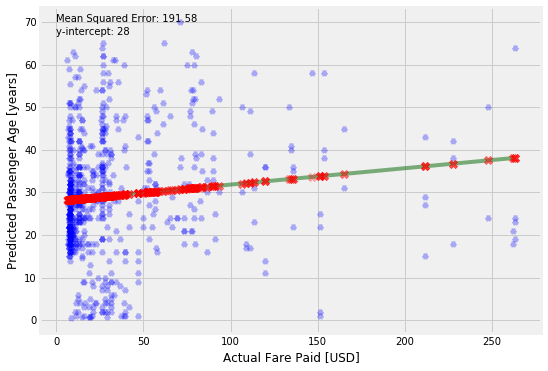

In [46]:
# Note #1: Looks like older folks pay a little more than younger folks.
# according to our first coefficient, 0.04, it looks like with every
# additional dollar spent, the passenger on average is 0.04 years (14 days) older.
# Note #2: blue markers on the chart are the actual data points (fares and 
# corresponding ages). Red markers are the predicted values of fare and age as
# dictated by the linear regression model. The green line is the regression
# line for all possible predicted values (not just the ones in the X set)

# Let's remove any outliers from our input data first
lof = LocalOutlierFactor(contamination='auto')
ti_clean = ti_clean[pd.Series(lof.fit_predict(ti_clean.values)).apply(lambda x: True if x == 1 else False).values]

# we need to reshape our X array since numpy won't allow
# us to concatenate a shape of (689,) but will allow us
# to concatenate a shape of (689, 1)
X = ti_clean['fare'].values.reshape(-1,1)
# append a matrix of 1s to produce a non-zero y intercept
X = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
# set "fare" as the factor we wish to predict
y = ti_clean['age'].values

# Note the difference in argument order compared to sklearn
# optionally, you can chain "fit()" to the model object
model = sm.OLS(y, X)
model = model.fit()

# first, plot the predicted age vs the fare paid
plt.figure(figsize=(8,6))

# First, we'll plot the actual values for fare.
# X[:,0] is just our fare column from our X matrix, only we 
# are using numpy to select the column instead of pandas.
# y is our actual age of the person. Markers are blue
plt.scatter(X[:,0], y, s=40, c=(0,0,1,0.3), marker='2', zorder=10)

# Next, we can plot the predicted values
plt.scatter(X[:,0], model.predict(X), s=70, c=(1,0,0,0.3), marker='X', zorder=10)
plt.ylabel("Predicted Passenger Age [years]")
plt.xlabel("Actual Fare Paid [USD]")

# plot the regression line from the model
X_to_predict = np.concatenate(
    (
        np.linspace(X[:,0].min(), X[:,0].max(), num=X.shape[0]).reshape(-1,1), 
        np.ones((X.shape[0], 1))
    ),
    axis=1
)

plt.plot(
    X_to_predict[:,0], 
    model.get_prediction(X_to_predict).predicted_mean, 
    c=(0,0.4,0,0.5)
)

# annotate
axes.arrow(42, 60, 4, -9, width=1, head_width=3, head_length=3, fc='k', ec='k')
plt.text(0, 70, f'Mean Squared Error: {mean_squared_error(y, model.predict(X)):.2f}', fontdict={'fontsize': 10})
plt.text(0, 67, f'y-intercept: {model.params[-1]:.0f}', fontdict={'fontsize': 10})

plt.show();

<a id="a-short-introduction-to-model-bias-and-variance"></a>
## A Short Introduction to Model Bias and Variance 

---

- **Objective:** Describe the bias and variance of statistical estimators.

In simple terms, **bias** shows how accurate a model is in its predictions. (It has **low bias** if it hits the bullseye!)

**Variance** shows how reliable a model is in its performance. (It has **low variance** if the points are predicted consistently!)

These characteristics have important interactions, but we will save that for later.

![Bias and Variance](../assets/images/biasVsVarianceImage.png)

Remember how we just calculated mean squared error to determine the accuracy of our prediction? It turns out we can do this for any statistical estimator, including mean, variance, and machine learning models.

We can even decompose mean squared error to identify where the source of error comes from.

<a id="bias-variance-decomposition"></a>
### Bias-Variance Decomposition

In the following notation, $f$ refers to a perfect model, while $\hat{f}$ refers to our model.

**Bias**

Error caused by bias is calculated as the difference between the expected prediction of our model and the correct value we are trying to predict:

$$Bias = E[\hat{f}(x)] - f(x)$$

**Variance**

Error caused by variance is taken as the variability of a model prediction for a given point:

$$Variance = E[(\hat{f}(x) - E[\hat{f}(x)])^2]$$

**Mean Squared Error**
$$MSE(\hat{f}(x)) = Var(\hat{f}(x)) + Bias(\hat{f}(x),f(x))^2$$

> The MSE is actually composed of three sources of error: The **variance**, **bias**, and some **irreducible error** that the model can never render given the available features.

This topic will come up again, but for now it's enough to know that we can decompose MSE into the bias of the estimator and the variance of the estimator.

<a id="example-using-bessels-correction"></a>
### Example Using Bessel's Correction

It's rarely practical to measure every single item in a population to gather a statistic. We will usually sample a few items and use those to infer a population value.

For example, we can take a class of 200 students and measure their height, but rather than measuring everyone, we select students at random to estimate the average height in the class and the variance of the height in the class.

We know we can take the mean as follows:

$$E[X] = \bar{X} =\frac 1n\sum_{i=1}^nx_i$$

What about the variance?

Intuitively and by definition, population variance looks like this (the average distance from the mean):

$$\frac {\sum{(x_i - \bar{X})^2}} {n}$$

It's actually better to use the following for a sample (why?):

$$\frac {\sum{(x_i - \bar{X})^2}} {n-1}$$

In some cases, we may even use:

$$\frac {\sum{(x_i - \bar{X})^2}} {n+1}$$

Detailed explanations can be found here:

- [Bessel correction](https://en.wikipedia.org/wiki/Bessel%27s_correction).
- [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error).

Let's show an example of computing the variance by hand.

Suppose we have the following data:

$$X = [1, 2, 3, 4, 4, 10]$$

First, we compute its mean: 

$$\bar{X} = (1/6)(1 + 2 + 3 + 4 + 4 + 10) = 4$$

Because this is a sample of data rather than the full population, we'll use the second formula. Let's first "mean center" the data:

$$X_{centered} = X - \bar{X} = [-3, -2, -1, 0, 0, 6]$$

Now, we'll just find the average squared distance of each point from the mean:

$$variance = \frac {\sum{(x_i - \bar{X})^2}} {n-1} = \frac {(-3)^2 + (-2)^2 + (-1)^2 + 0^2 + 0^2 + 6^2}{6-1} = \frac{14 + 36}{5} = 10$$

So, the **variance of $X$** is $10$. However, we cannot compare this directly to the original units because it is in the original units squared. So, we will use the **standard deviation of $X$**, $\sqrt{10} \approx 3.16$ to see that the value of $10$ is farther than one standard deviation from the mean of $4$. So, we can conclude it is somewhat far from most of the points (more on what it really might mean later).

---

A variance of zero means there is no spread. If we take instead $X = [1, 1, 1, 1]$, then clearly the mean $\bar{X} = 1$. So, $X_{centered} = [0, 0, 0, 0]$, which directly leads to a variance of 0. (Make sure you understand why! Remember that variance is the average squared distance of each point from the mean.)

In [47]:
heights = np.random.rand(200) + 6.5

In [48]:
def plot_means(sample_size):
    true_mean = np.mean(heights)

    mean_heights = []
    for n in range(5,sample_size):
        for j in range(30):
            mean_height = np.mean(np.random.choice(heights, n, replace=False))
            mean_heights.append((n, mean_height))
    
    sample_height = pd.DataFrame(mean_heights, columns=['sample_size', 'height'])

    sample_height.plot.scatter(x='sample_size', y='height', figsize=(14, 4), alpha=0.5)
    plt.axhline(y=true_mean, c='r')
    plt.title("The Bias and Variance of the Mean Estimator")
    plt.show()

In [49]:
def plot_variances(sample_size):
    true_variance = np.var(heights)

    var_heights = []
    for n in range(5,sample_size):
        for j in range(30):
            var_height1 = np.var(np.random.choice(heights, n, replace=False), ddof=0)
            var_height2 = np.var(np.random.choice(heights, n, replace=False), ddof=1)
            var_height3 = np.var(np.random.choice(heights, n, replace=False), ddof=-1)
            var_heights.append((n, var_height1, var_height2, var_height3))
    
    sample_var = pd.DataFrame(var_heights, columns=['sample_size', 'variance1', 'variance2', 'variance3'])
    sample_var.plot.scatter(x='sample_size', y='variance1', figsize=(14, 3), alpha=0.5)
    plt.axhline(y=true_variance, c='r')
    plt.title("The Bias and Variance of the Population Variance Estimator (n)")
    
    sample_var.plot.scatter(x='sample_size', y='variance3', figsize=(14, 3), alpha=0.5)
    plt.axhline(y=true_variance, c='r')
    plt.title("The Bias and Variance of the Biased Sample Variance Estimator (n+1)")
    
    sample_var.plot.scatter(x='sample_size', y='variance2', figsize=(14, 3), alpha=0.5)
    plt.axhline(y=true_variance, c='r')
    plt.title("The Bias and Variance of the Sample Variance Estimator (n-1)")
    plt.show()

In [50]:
interact(plot_means, sample_size=(5,200));

interactive(children=(IntSlider(value=102, description='sample_size', max=200, min=5), Output()), _dom_classes…

- The red line in the chart above is the true average height, but because we don't want to ask 200 people about their height, we take a samples.

- The blue dots show the estimate of the average height after taking a sample. To give us an idea of how sampling works, we simulate taking multiple samples.

- The $X$ axis shows the sample size we take, while the blue dots show the likely average heights we'll conclude for a given sample size.

- Even though the true average height is around 7 feet, a small sample may lead us to think that it's actually 6.7 or 7.3 feet. 

- Notice that the red line is in the center of our estimates. On average, we are correct and have no bias.

- If we take a larger sample size, we get a better estimate. This means that the variance of our estimate gets smaller with larger samples sizes.

In [51]:
interact(plot_variances, sample_size=(5,200));

interactive(children=(IntSlider(value=102, description='sample_size', max=200, min=5), Output()), _dom_classes…

- Not all estimators are created equal.

- The red lines in the charts above show the true variance of height.

- The top graph is the population variance estimator, while the bottom graph is the sample variance estimator.

- It's subtle, but notice that the population variance estimator is not centered on the red line. It's actually biased and consistently underestimates the true variance, especially at low sample sizes.

- You may also notice that the scatter of the population variance estimator is smaller. That means the variance of the population variance estimator is smaller. Essentially, it's the variability of the estimator. 

- Play around with the sliders to get a good view of the graphs.

<a id="correlation-and-association"></a>
## Correlation and Association
---

- **Objective:** Describe characteristics and trends in a data set using visualizations.

Correlation measures how variables related to each other.

Typically, we talk about the Pearson correlation coefficient — a measure of **linear** association.

We refer to perfect correlation as **collinearity**.

The following are a few correlation coefficients. Note that if both variables trend upward, the coefficient is positive. If one trends opposite the other, it is negative. 

It is important that you always look at your data visually — the coefficient by itself can be misleading:

![Example correlation values](../assets/images/correlation_examples.png)

<a id="codealong-correlation-in-pandas"></a>
### Code-Along: Correlation in Pandas

**Objective:** Explore options for measuring and visualizing correlation in Pandas.

#### Display the correlation matrix for all Titanic variables:

In [52]:
titanic.corr()

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


#### Use Seaborn to plot a heat map of the correlation matrix:

The `sns.heatmap()` function will accomplish this.

- Generate a correlation matrix from the Titanic data using the `.corr()` method.
- Pass the correlation matrix into `sns.heatmap()` as its only parameter.

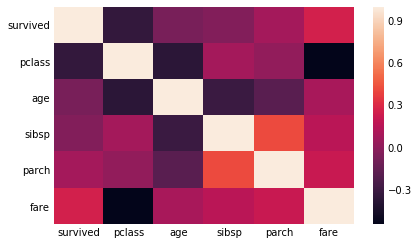

In [53]:
# Use Seaborn to plot a correlation heatmap
sns.heatmap(titanic.corr());

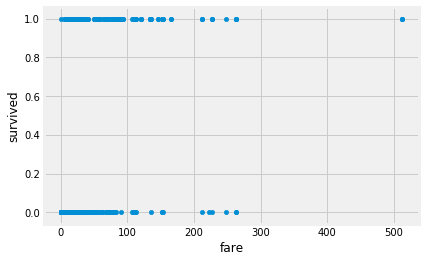

In [54]:
# Take a closer look at survived and fare using a scatter plot
titanic.plot.scatter(x='fare', y='survived');
# Is correlation a good way to inspect the association of fare and survival?

<a id="the-normal-distribution"></a>
## The Normal Distribution
---

- **Objective:** Identify a normal distribution within a data set using summary statistics and data visualizations.

###  Math Review
- What is an event space?
  - A listing of all possible occurrences.
- What is a probability distribution?
  - A function that describes how events occur in an event space.
- What are general properties of probability distributions?
  - All probabilities of an event are between 0 and 1.
  - The probability that something occurs is almost certain, or 1.
  

<a id="what-is-the-normal-distribution"></a>
### What is the Normal Distribution?
- A normal distribution is often a key assumption to many models.
  - In practice, if the normal distribution assumption is not met, it's not the end of the world. Your model is just less efficient in most cases.

- The normal distribution depends on the mean and the standard deviation.

- The mean determines the center of the distribution. The standard deviation determines the height and width of the distribution.

- Normal distributions are symmetric, bell-shaped curves.

- When the standard deviation is large, the curve is short and wide.

- When the standard deviation is small, the curve is tall and narrow.

![normal distribution](../assets/images/normal.png)


#### Why do we care about normal distributions?

- They often show up in nature.
- Aggregated processes tend to distribute normally, regardless of their underlying distribution — provided that the processes are uncorrelated or weakly correlated (central limit theorem).
- They offer effective simplification that makes it easy to make approximations.

#### Plot a histogram of 1,000 samples from a random normal distribution:

The `np.random.randn(numsamples)` function will draw from a random normal distribution with a mean of 0 and a standard deviation of 1.

- To plot a histogram, pass a NumPy array with 1000 samples as the only parameter to `plt.hist()`.
- Change the number of bins using the keyword argument `bins`, e.g. `plt.hist(mydata, bins=50)`

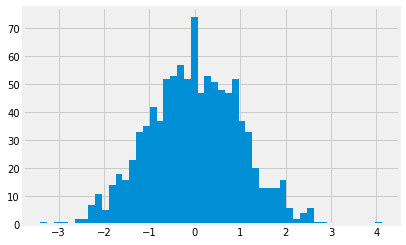

In [55]:
# Plot a histogram of several random normal samples from NumPy.
plt.hist(np.random.randn(1000), bins=50);

<a id="skewness"></a>
###  Skewness
- Skewness is a measure of the asymmetry of the distribution of a random variable about its mean.
- Skewness can be positive or negative, or even undefined.
- Notice that the mean, median, and mode are the same when there is no skew.

![skewness](../assets/images/skewness---mean-median-mode.jpg)

#### Plot a lognormal distribution generated with NumPy.

Take 1,000 samples using `np.random.lognormal(size=numsamples)` and plot them on a histogram.

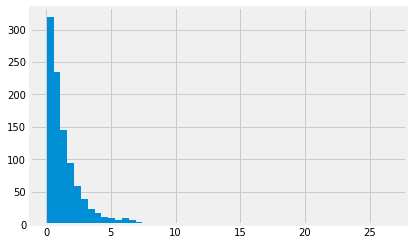

In [56]:
# Plot a lognormal distribution generated with NumPy
plt.hist(np.random.lognormal(size=1000), bins=50);

#####  Real World Application - When mindfullness beats complexity
- Skewness is surprisingly important.
- Most algorithms implicitly use the mean by default when making approximations.
- If you know your data is heavily skewed, you may have to either transform your data or set your algorithms to work with the median.

<a id="kurtosis"></a>
### Kurtosis
- Kurtosis is a measure of whether the data are peaked or flat, relative to a normal distribution.
- Data sets with high kurtosis tend to have a distinct peak near the mean, decline rather rapidly, and have heavy tails. 

![kurtosis](../assets/images/kurtosis.jpg)

####  Real-World Application: Risk Analysis
- Long-tailed distributions with high kurtosis elude intuition; we naturally think the event is too improbable to pay attention to.
- It's often the case that there is a large cost associated with a low-probability event, as is the case with hurricane damage.
- It's unlikely you will get hit by a Category 5 hurricane, but when you do, the damage will be catastrophic.
- Pay attention to what happens at the tails and whether this influences the problem at hand.
- In these cases, understanding the costs may be more important than understanding the risks.

<a id="determining-the-distribution-of-your-data"></a>
## Determining the Distribution of Your Data
---

**Objective:** Create basic data visualizations, including scatterplots, box plots, and histograms.

![](../assets/images/distributions.png)

#### Use the `.hist()` function of your Titantic DataFrame to plot histograms of all the variables in your data.

- The function `plt.hist(data)` calls the Matplotlib library directly.
- However, each DataFrame has its own `hist()` method that by default plots one histogram per column. 
- Given a DataFrame `my_df`, it can be called like this: `my_df.hist()`. 

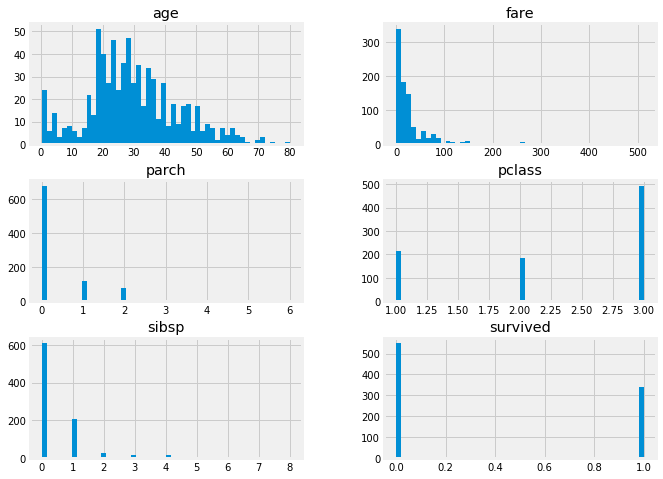

In [57]:
# Plot all variables in titanic using histograms
titanic.hist(figsize=(10, 8), bins=50);

#### Use the built-in `.plot.box()` function of your Titanic DataFrame to plot box plots of your variables.

- Given a DataFrame, a box plot can be made where each column is one tick on the x axis.
- To do this, it can be called like this: `my_df.plot.box()`.
- Try using the keyword argument `showfliers`, e.g. `showfliers=False`.

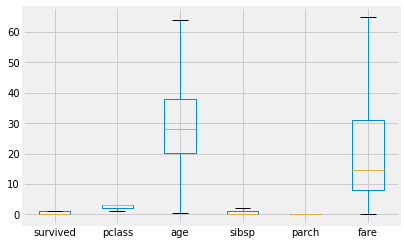

In [58]:
# Plotting all histograms can be unweildly, boxplots can be more concise
titanic.plot.box(showfliers=False);

<a id="exercise"></a>
### Exercise

1. Look at the Titanic data variables.
- Are any of them normal?
- Are any skewed?
- How might this affect our modeling?

![](../assets/images/visualization_flow_chart.jpg)

<a id="topic-review"></a>
## Lesson Review
---

- We covered several different types of summary statistics, what are they?
- We covered three different types of visualizations, which ones?
- Describe bias and variance and why they are important.
- What are some important characteristics of distributions?

**Any further questions?**